In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
from blimpy import read_header, Waterfall, Filterbank

%matplotlib inline
import matplotlib.pyplot as plt

import sys, os, glob
sys.path.append("../")
import setigen as stg

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


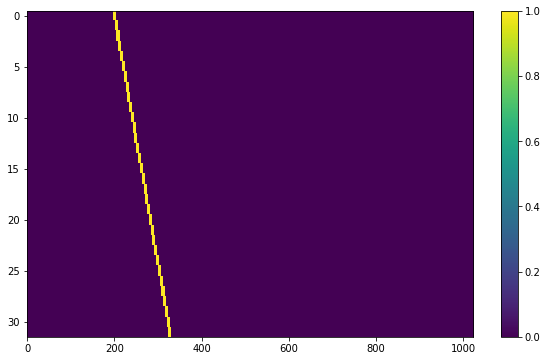

In [16]:
fil = Waterfall('../setigen/assets/placeholder.fil')
frame = stg.Frame(fil=fil)
signal = frame.add_signal(stg.constant_path(f_start = frame.fs[200], 
                                            drift_rate = -0.000004),
                          stg.constant_t_profile(level = 1),
                          stg.box_f_profile(width = 0.00001),
                          stg.constant_bp_profile(level = 1))

fig = plt.figure(figsize=(10,6))
plt.imshow(signal, aspect='auto')
plt.colorbar()
plt.savefig('test.png')
plt.show()

In [17]:
from astropy import units as u

In [23]:
rate = u.pixel / u.Hz
rate

Unit("pix / Hz")

In [32]:
((5*u.Hz) * rate)

<Quantity 5. pix>